# Stock Market Project Analysis
### Instructer by Jose Portilla from Pierian Data
I'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Dec 1 2020.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Getting the data

Tesla Stock (Ticker: TSLA on the NASDAQ)

In [2]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 12, 1)

In [3]:
Tesla = web.DataReader("TSLA", 'yahoo', start, end)

In [4]:
Tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001


Ford and GM (General Motors)

In [5]:
Ford = web.DataReader("F", 'yahoo', start, end)

In [6]:
Ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,15.65,15.18,15.59,15.36,24777900.0,11.190040
2015-01-05,15.13,14.69,15.12,14.76,44079700.0,10.752932
2015-01-06,14.90,14.38,14.88,14.62,32981600.0,10.650939
2015-01-07,15.09,14.77,14.78,15.04,26065300.0,10.956917
2015-01-08,15.48,15.23,15.40,15.42,33943400.0,11.233754


In [7]:
GM = web.DataReader("GM", 'yahoo', start, end)

In [8]:
GM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,35.310001,34.410000,35.270000,34.840000,9756700.0,27.594938
2015-01-05,35.250000,34.070000,34.980000,34.330002,16223000.0,27.190994
2015-01-06,35.220001,34.099998,34.410000,34.849998,17747600.0,27.602859
2015-01-07,35.950001,35.040001,35.230000,35.840000,19319200.0,28.386992
2015-01-08,36.450001,35.799999,36.060001,36.200001,15206600.0,28.672125


### Visualizing the data

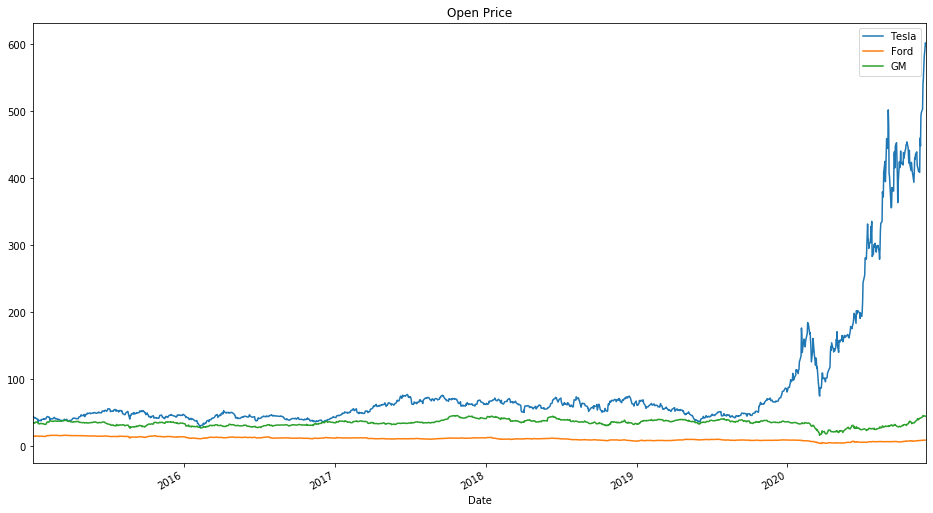

In [9]:
Tesla['Open'].plot(label='Tesla',figsize=(16,9),title='Open Price')
Ford['Open'].plot(label='Ford')
GM['Open'].plot(label='GM')
plt.legend();

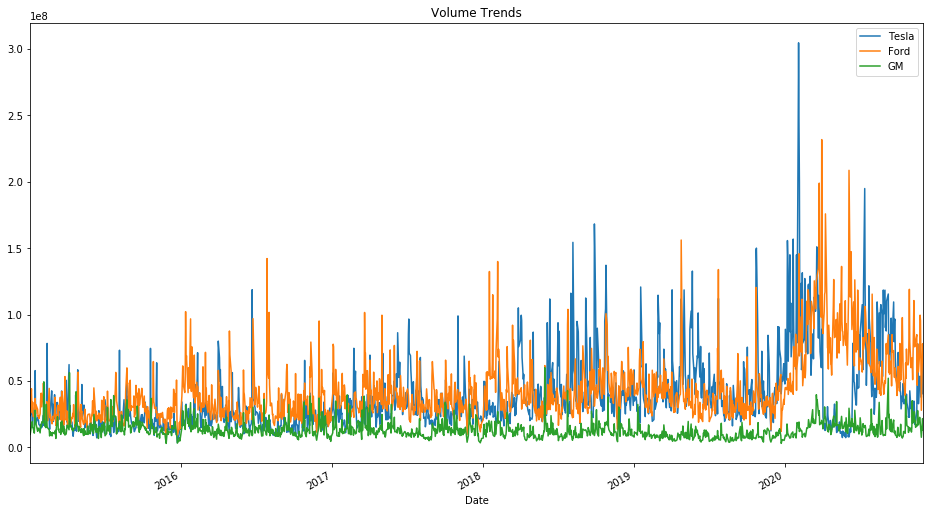

In [10]:
Tesla['Volume'].plot(label='Tesla',figsize=(16,9),title='Volume Trends')
Ford['Volume'].plot(label='Ford')
GM['Volume'].plot(label='GM')
plt.legend();

What happened on the maximun trading volumne for Tesla?

In [11]:
Tesla.idxmax()

High        2020-11-30
Low         2020-11-27
Open        2020-11-30
Close       2020-11-27
Volume      2020-02-04
Adj Close   2020-11-27
dtype: datetime64[ns]

In [12]:
Tesla['Volume'].max()

304694000.0

In [13]:
Tesla['Volume'].argmax()

C:\Users\Amanda Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2020-02-04 00:00:00')

https://www.nytimes.com/issue/todaysheadlines/2020/02/04/todays-headlines

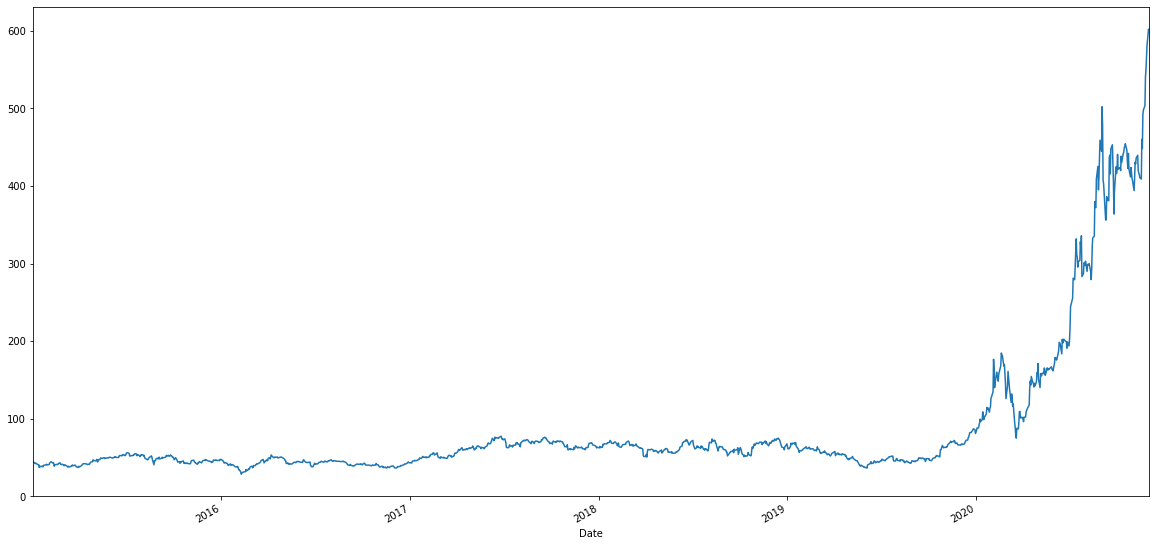

In [14]:
Tesla['Open'].plot(figsize=(20,10))

Now I need to look at the total market cap of the company, not just the stock price. Unfortunately current data doesn't have that information of total units of stock present. So I need to do as a simple calcualtion to represent total money traded with multpling the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series.

Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.

In [15]:
Tesla['Total Trade'] = Tesla['Open']*Tesla['Volume']
Ford['Total Trade'] = Ford['Open']*Ford['Volume']
GM['Total Trade'] = GM['Open']*GM['Volume']

Plot this "Total Traded" against the time index.

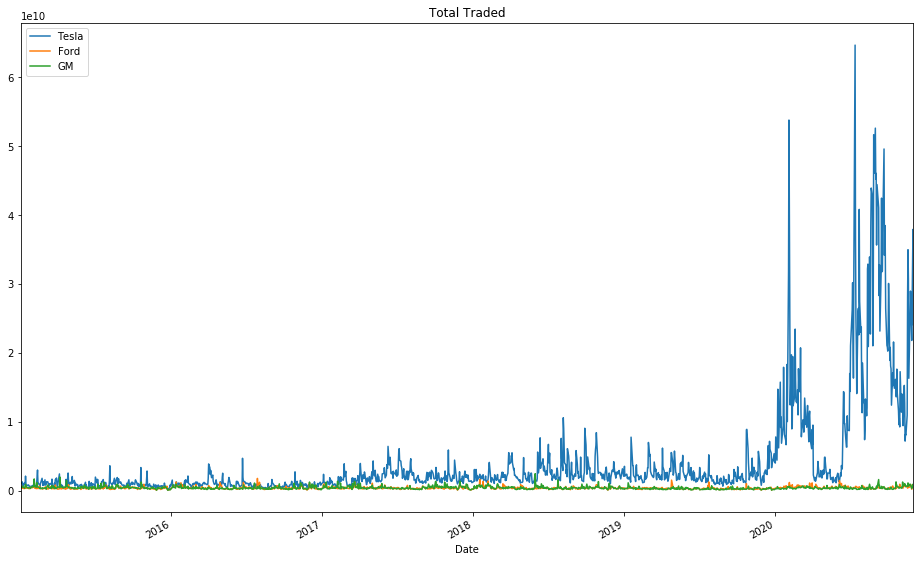

In [16]:
Tesla['Total Trade'].plot(label='Tesla',figsize=(16,10),title='Total Traded')
Ford['Total Trade'].plot(label='Ford')
GM['Total Trade'].plot(label='GM')
plt.legend()

Interesting, looks like there was huge amount of money traded for Tesla somewhere in mid 2020. What date was that and what happened?

In [17]:
Tesla.idxmax()

High          2020-11-30
Low           2020-11-27
Open          2020-11-30
Close         2020-11-27
Volume        2020-02-04
Adj Close     2020-11-27
Total Trade   2020-07-13
dtype: datetime64[ns]

In [23]:
Tesla['Total Trade'].argmax()

C:\Users\Amanda Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2020-07-13 00:00:00')

https://www.bloomberg.com/news/articles/2020-07-13/ten-thousand-day-traders-an-hour-pour-into-tesla

MA (Moving Averages). Plot of MA50 and MA200 for GM.

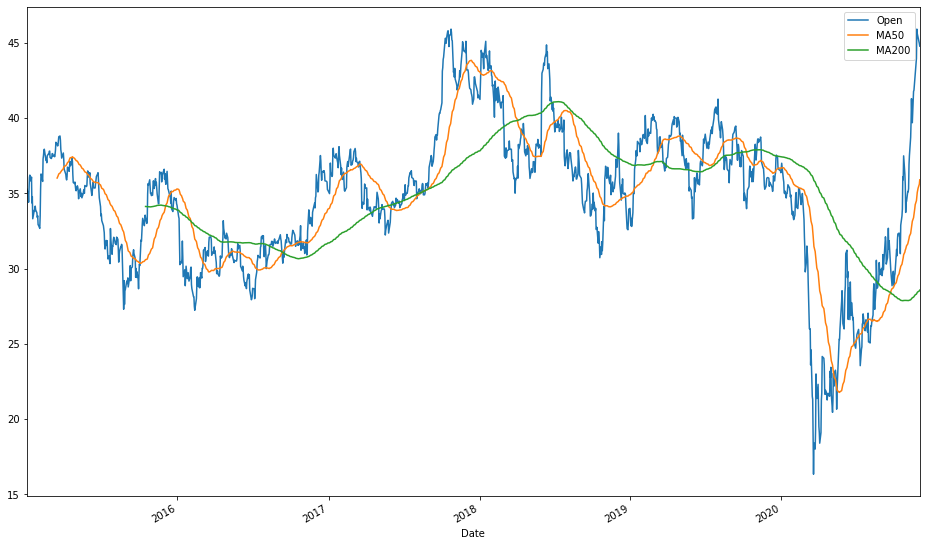

In [27]:
GM['MA50']=GM['Open'].rolling(50).mean()
GM['MA200']=GM['Open'].rolling(200).mean()
GM[['Open','MA50','MA200']].plot(figsize=(16,10))

 Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot.

In [28]:
from pandas.plotting import scatter_matrix

In [51]:
#GM=GM.drop(['MA50','MA200'],axis=1)
car_merged = pd.concat([Tesla['Open'],Ford['Open'],GM['Open']],axis=1)

In [52]:
car_merged.columns=['Tesla Open','F Open', 'GM Open']

In [53]:
car_merged.head()

,Tesla Open,F Open,GM Open
Date,,,
2015-01-02,44.574001,15.59,35.270000
2015-01-05,42.910000,15.12,34.980000
2015-01-06,42.012001,14.88,34.410000
2015-01-07,42.669998,14.78,35.230000
2015-01-08,42.562000,15.40,36.060001


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD6B114860>,
      dtype=object)

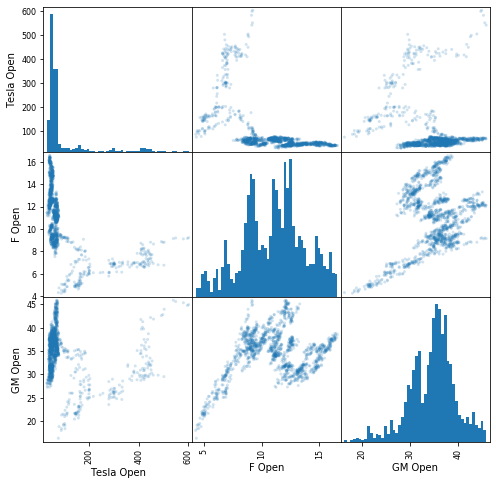

In [55]:
scatter_matrix(car_merged,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})

There is a positive correlation between Ford and Genaral Motors.
Tesla is quite a bit different has some different behivor and that makes sense because we saw there was a huge jump is Tesla stock price while General Motors and Ford knid of Stayed at the same level.

### CandleStick chart for Tesla in January 2020

In [67]:
from mplfinance.original_flavor import candlestick_ohlc

In [68]:
from matplotlib.dates import DateFormatter, WeekdayLocator,DayLocator,MONDAY,date2num

In [71]:
Tesla_reset = Tesla.loc['2020-01'].reset_index()

In [84]:
Tesla_reset.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,date_ax
16,2020-01-27,112.888000,107.856003,108.398003,111.603996,68040500.0,111.603996,7.375454e+09,737451.0
17,2020-01-28,115.362000,111.615997,113.697998,113.379997,58942500.0,113.379997,6.701644e+09,737452.0
18,2020-01-29,117.959999,113.486000,115.138000,116.197998,89007500.0,116.197998,1.024815e+10,737453.0
19,2020-01-30,130.175995,123.599998,126.484001,128.162003,145028500.0,128.162003,1.834378e+10,737454.0
20,2020-01-31,130.600006,126.503998,128.000000,130.113998,78596500.0,130.113998,1.006035e+10,737455.0


In [73]:
Tesla_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
Date           21 non-null datetime64[ns]
High           21 non-null float64
Low            21 non-null float64
Open           21 non-null float64
Close          21 non-null float64
Volume         21 non-null float64
Adj Close      21 non-null float64
Total Trade    21 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.4 KB


In [74]:
Tesla_reset['date_ax']=Tesla_reset['Date'].apply(lambda date:date2num(date))
#date2num:change a date into a number 

In [75]:
Tesla_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,date_ax
0,2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,4.046377e+09,737426.0
1,2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,7.831429e+09,737427.0
2,2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,4.463283e+09,737430.0
3,2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,8.250801e+09,737431.0
4,2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,1.475305e+10,737432.0


In [76]:
list_of_cols=['date_ax','Open','High','Low','Close']

tesla_values=[tuple(vals) for vals in Tesla_reset[list_of_cols].values]

In [77]:
tesla_values

[(737426.0,
  84.9000015258789,
  86.13999938964844,
  84.34200286865234,
  86.052001953125),
 (737427.0,
  88.0999984741211,
  90.80000305175781,
  87.38400268554688,
  88.60199737548828),
 (737430.0, 88.09400177001953, 90.31199645996094, 88.0, 90.30799865722656),
 (737431.0,
  92.27999877929688,
  94.32599639892578,
  90.6719970703125,
  93.81199645996094),
 (737432.0,
  94.73999786376953,
  99.697998046875,
  93.64600372314453,
  98.4280014038086),
 (737433.0,
  99.41999816894531,
  99.76000213623047,
  94.5739974975586,
  96.26799774169922),
 (737434.0,
  96.35800170898438,
  96.98799896240234,
  94.73999786376953,
  95.62999725341797),
 (737437.0,
  98.69999694824219,
  105.1259994506836,
  98.4000015258789,
  104.97200012207031),
 (737438.0,
  108.85199737548828,
  109.48200225830078,
  104.9800033569336,
  107.58399963378906),
 (737439.0,
  105.9520034790039,
  107.56800079345703,
  103.35800170898438,
  103.69999694824219),
 (737440.0, 98.75, 102.89199829101562, 98.433998107910

In [78]:
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()                  # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

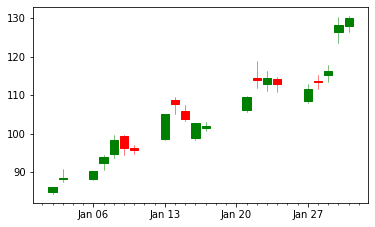

In [83]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, tesla_values, width=0.8,colorup='g',colordown='r');

## Basic Financial Analysis

### Daily Percentage Change
If the price fluctuate wildly then this value would be larger whether it's a larger negative number or a large positive number depending on whether you're gaining or losing. 

In [87]:
Tesla['Returns']= Tesla['Close'].pct_change()
#Same:Tesla['Returns']= (Tesla['Close']/Tesla['Close'].shift(1))-1

In [93]:
Tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Trade,Returns
Date,,,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000,1.061842e+09,NaN
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002,1.151812e+09,-0.042041
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001,1.315375e+09,0.005664
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999,6.333081e+08,-0.001562
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001,7.325984e+08,-0.001564


In [94]:
Ford['Returns']= Ford['Close'].pct_change()

In [96]:
Ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Trade,Returns
Date,,,,,,,,
2015-01-02,15.65,15.18,15.59,15.36,24777900.0,11.190040,3.862875e+08,NaN
2015-01-05,15.13,14.69,15.12,14.76,44079700.0,10.752932,6.664851e+08,-0.039062
2015-01-06,14.90,14.38,14.88,14.62,32981600.0,10.650939,4.907662e+08,-0.009485
2015-01-07,15.09,14.77,14.78,15.04,26065300.0,10.956917,3.852451e+08,0.028728
2015-01-08,15.48,15.23,15.40,15.42,33943400.0,11.233754,5.227283e+08,0.025266


In [95]:
GM['Returns']= GM['Close'].pct_change()

In [97]:
GM.head()

,High,Low,Open,Close,Volume,Adj Close,Total Trade,Returns
Date,,,,,,,,
2015-01-02,35.310001,34.410000,35.270000,34.840000,9756700.0,27.594938,3.441188e+08,NaN
2015-01-05,35.250000,34.070000,34.980000,34.330002,16223000.0,27.190994,5.674805e+08,-0.014638
2015-01-06,35.220001,34.099998,34.410000,34.849998,17747600.0,27.602859,6.106949e+08,0.015147
2015-01-07,35.950001,35.040001,35.230000,35.840000,19319200.0,28.386992,6.806154e+08,0.028408
2015-01-08,36.450001,35.799999,36.060001,36.200001,15206600.0,28.672125,5.483500e+08,0.010045


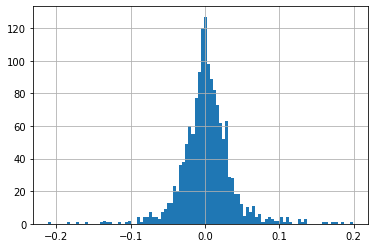

In [114]:
Tesla['Returns'].hist(bins=100)

#### Histogram

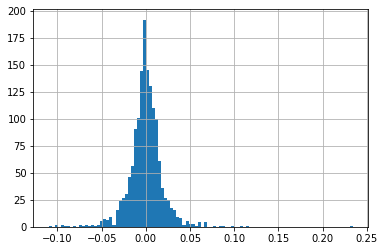

In [113]:
Ford['Returns'].hist(bins=100)

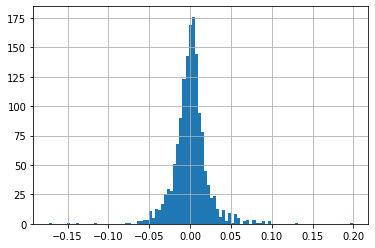

In [112]:
GM['Returns'].hist(bins=100)

As you see above histograms, Tesla has wider distribution than other. So Tesla can actually go up to around negative point to and beyond positive point to.
The stacked histogram below shows more clear that Tesla has more volitility than other stocks. 

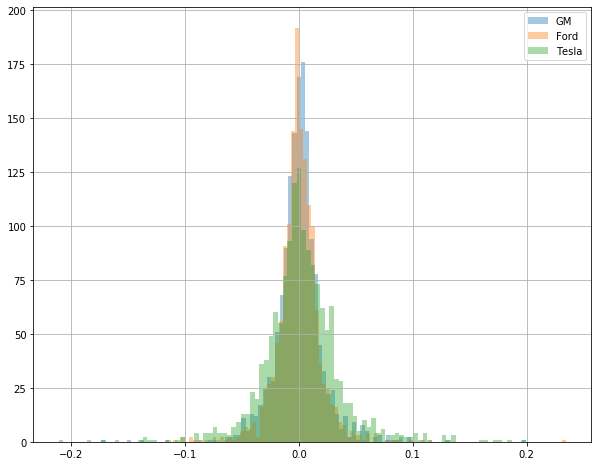

In [119]:
GM['Returns'].hist(bins=100,label='GM',figsize=(10,8),alpha=0.4)
Ford['Returns'].hist(bins=100,label='Ford',figsize=(10,8),alpha=0.4)
Tesla['Returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.4)
plt.legend()

#### Kernel Density Estimation
Ford clearly peaking much more stable than Tesla and a little more stable than GM. So Ford with the highest peak centered around zero that a lot of daily return tend to be the same. It's relatively flat stock in comparison to Tesla. You can see Tesla here is little wider meaning a little more volatility.

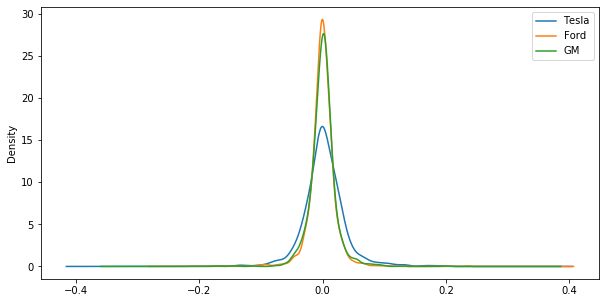

In [126]:
Tesla['Returns'].plot.kde(label='Tesla',figsize=(10,5))
Ford['Returns'].plot.kde(label='Ford')
GM['Returns'].plot.kde(label='GM')
plt.legend()

#### Box plot
Here again that Tesla returns quite a bit more of a wide distribution a lot more outliers.

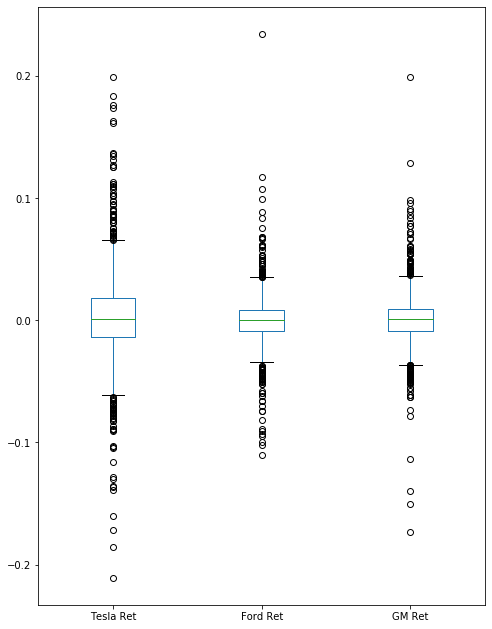

In [131]:
box_df=pd.concat([Tesla['Returns'],Ford['Returns'],GM['Returns']],axis=1)
box_df.columns=['Tesla Ret','Ford Ret','GM Ret']
box_df.plot.box(figsize=(8,11))

#### Comparing Daily Returns between Stocks

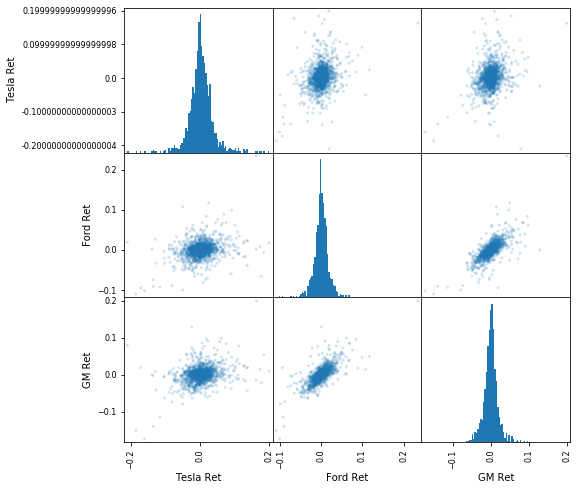

In [135]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});

It looks like Ford and GM do have some sort of possible relationship.

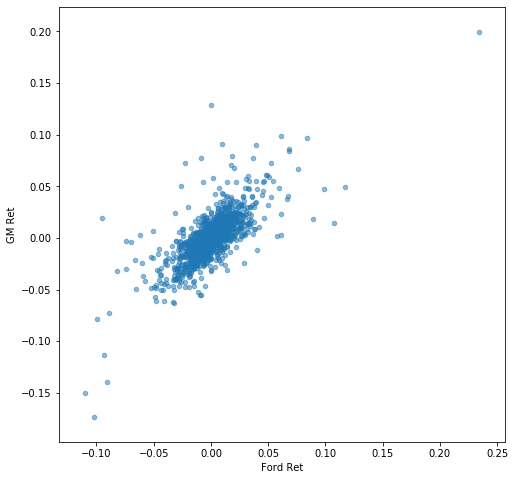

In [136]:
box_df.plot.scatter(x='Ford Ret',y='GM Ret',alpha=0.5,figsize=(8,8))

### Cumulative Daily Returns
Cumulative return is computedreativeto the day investment is made. If cumulative return is above one, you are making profits else you are in loss.

In [137]:
Tesla['Cumulative Return']=(1+Tesla['Returns']).cumprod()

In [143]:
Tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Trade,Returns,Cumulative Return
Date,,,,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000,1.061842e+09,NaN,NaN
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002,1.151812e+09,-0.042041,0.957959
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001,1.315375e+09,0.005664,0.963385
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999,6.333081e+08,-0.001562,0.961880
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001,7.325984e+08,-0.001564,0.960376


In [145]:
Ford['Cumulative Return']=(1+Ford['Returns']).cumprod()

In [146]:
GM['Cumulative Return']=(1+GM['Returns']).cumprod()

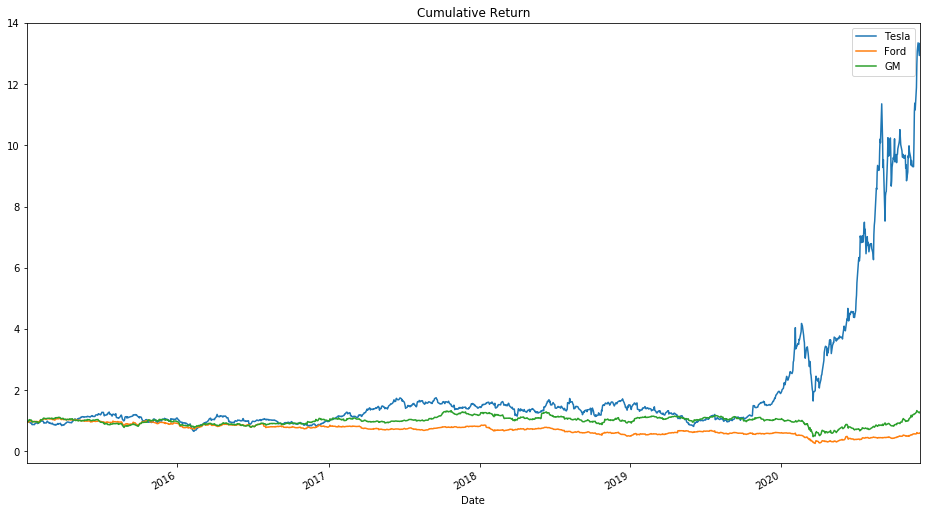

In [147]:
Tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,9),title='Cumulative Return')
Ford['Cumulative Return'].plot(label='Ford')
GM['Cumulative Return'].plot(label='GM')
plt.legend()